In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
import numpy as np

C:\Users\taher\AppData\Local\Temp\ipykernel_13272\2783045562.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# Import data
train_inputs = pd.read_csv('train_inputs.csv', header=None)
train_targets = pd.read_csv('train_targets.csv', header=None)

test_inputs = pd.read_csv('test_inputs.csv', header=None)
test_targets = pd.read_csv('test_targets.csv', header=None)

# Convert to numpy arrays
train_inputs = train_inputs.to_numpy()
train_targets = train_targets.to_numpy()

test_inputs = test_inputs.to_numpy()
test_targets = test_targets.to_numpy()


In [4]:
class LinearModel():
    def __init__(self, train_inputs, train_targets, iterations=1, learning_rate=0.01):
        '''
        # Linear Regression

        Simple linear model that uses gradient descent to minimize the mean squared error (which is the loss function).
        The number of iterations and the learning rate can be set when creating the model, but by default it's set to 1 and 0.01 respectively.
        The iterations is the number of times the model will update the weights and intercept to minimize the loss function. Iterations is chosen to be 1 for this particular assignment.
        The learning rate is the size of the step the model takes to minimize the loss function. It has a default value of 0.01, but should be changed according to the instructions of this assignment.
        
        ## Parameters
        train_inputs : numpy array
            The features of the training set
        train_targets : numpy array
            The targets of the training set
        iterations : int
            The number of iterations the model will update the weights and intercept
        learning_rate : float
            The size of the step the model takes to minimize the loss function
        '''


        self.train_inputs = train_inputs
        self.train_targets = train_targets

        # Get the number of features
        self.num_weights = train_inputs.shape[1]

        # Make the weights (initialized to 0, can randomize them as well, but will give different score for Test at the end)
        self.weights = np.zeros((self.num_weights, 1))
        self.intercept = 0

        self.iterations = iterations
        self.learning_rate = learning_rate

    def predict(self, inputs):
        '''
        ## Parameters
        inputs : numpy array
            The features of the dataset
        
        ## Returns
        numpy array
            The predicted targets for given inputs based on the current weights and intercept
        '''
        # y = mx + b // predicted = intercept + weights[0] * features[0] + weights[1] * features[1]
        y = self.intercept + np.dot(inputs, self.weights)
        return y


    def fit(self):
        '''
        Updates the weights and intercept to minimize the loss function using gradient descent for the specified number of iterations.
        '''
        for i in range(self.iterations):

            predictions = self.predict(self.train_inputs) # train inputs = [ [1, 2], [3, 4], ... ], predictions = [1, 2, ...]

            # Calculate error
            error = self.train_targets - predictions

            # Get derivative of loss function w.r.t. weights
            train_inputs_transposed = np.transpose(self.train_inputs)
            gradient_weights = -2 * np.dot(train_inputs_transposed, error)
            gradient_weights = gradient_weights / self.train_inputs.shape[0]

            # Calculate derivative of loss function w.r.t. intercept
            gradient_intercept = -2 * np.mean(error)

            # Update the weights and intercept
            self.weights -= self.learning_rate * gradient_weights
            self.intercept -= self.learning_rate * gradient_intercept



    def score(self, test_inputs, test_targets):
        '''
        Tests the model on the test dataset passed to measure the performance of the model.

        ## Parameters
        test_inputs : numpy array
            The features of the test set
        test_targets : numpy array
            The targets of the test set
        
        ## Returns
        float
            The mean squared error of the test set
        '''
        predictions = self.predict(test_inputs)
        error = test_targets - predictions

        # Mean squared error
        return np.mean(error**2)

In [8]:
lr_scores = dict()

# Test learning rates 0 -> 3
for _lr in range(0, 31, 1):

    # Score for each fold
    fold_scores = []

    lr = _lr / 10
    # Helper function to split data into training and validation segments
    kf = model_selection.KFold(n_splits=10, shuffle=False)

    # i = fold number, train_index = indices of training data, test_index = indices of validation data
    for i, (train_index, validation_index) in enumerate(kf.split(train_inputs)):

        # Get all training inputs and targets for this fold (train_index is an array of indices of the data selected for training for this fold)
        fold_train_inputs, fold_train_targets = train_inputs[train_index], train_targets[train_index]
        # Get all validation inputs and targets for this fold (validation_index is an array of indices of the data selected for validation for this fold)
        validation_inputs, validation_targets = train_inputs[validation_index], train_targets[validation_index]

        # Create model
        linModel = LinearModel(fold_train_inputs, fold_train_targets, learning_rate=lr)

        # Train model
        linModel.fit()

        # Get score
        score = linModel.score(validation_inputs, validation_targets)
        fold_scores.append(score)
    
    lr_scores[lr] = np.mean(fold_scores)


Best learning rate: 0.3


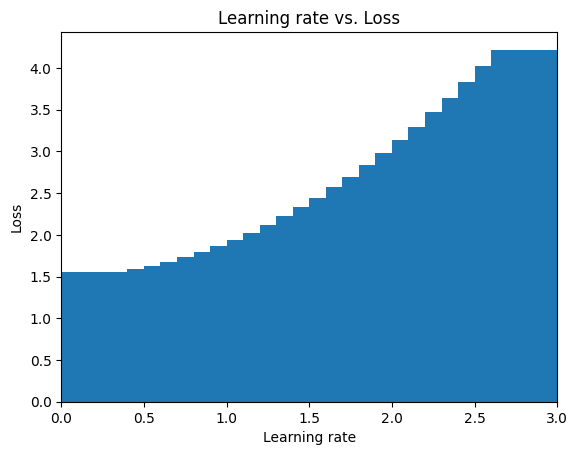

In [6]:
# Lowest loss
best_lr = min(lr_scores, key=lr_scores.get)
print(f"Best learning rate: {best_lr}")

plt.bar(lr_scores.keys(), lr_scores.values())
plt.title('Learning rate vs. Loss')
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.xlim(0, 3)
plt.show()


In [7]:
# Test model

# Train the model with the best learning rate
linModel = LinearModel(train_inputs, train_targets, learning_rate=best_lr)
linModel.fit()

# Measure the generalization / performance of our model on some testing data through .score( )
test_score = linModel.score(test_inputs, test_targets)
print(f"Test score: {test_score}")

Test score: 1.634944909191331
